In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
df = pd.read_excel('WA_WIND_DATA.xlsx',index_col=0)

In [4]:
print(df)

                     Pressure | (atm)  Wind direction | (deg)  \
DateTime                                                        
2007-01-01 00:00:00          0.890467                     104   
2007-01-01 01:00:00          0.890583                     106   
2007-01-01 02:00:00          0.890366                     102   
2007-01-01 03:00:00          0.890326                      99   
2007-01-01 04:00:00          0.890549                      98   
...                               ...                     ...   
2009-12-31 19:00:00          0.879789                     125   
2009-12-31 20:00:00          0.878944                     127   
2009-12-31 21:00:00          0.878314                     124   
2009-12-31 22:00:00          0.877968                     122   
2009-12-31 23:00:00          0.877938                     119   

                     Wind speed | (m/s)  Power generated by system | (kW)  
DateTime                                                                   
20

In [5]:
df.head()

,Pressure | (atm),Wind direction | (deg),Wind speed | (m/s),Power generated by system | (kW)
DateTime,,,,
2007-01-01 00:00:00,0.890467,104,3.429,0.00
2007-01-01 01:00:00,0.890583,106,3.579,0.00
2007-01-01 02:00:00,0.890366,102,4.307,1986.68
2007-01-01 03:00:00,0.890326,99,4.562,2597.61
2007-01-01 04:00:00,0.890549,98,4.553,2555.46


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26280 entries, 2007-01-01 00:00:00 to 2009-12-31 23:00:00
Data columns (total 4 columns):
Pressure | (atm)                    26280 non-null float64
Wind direction | (deg)              26280 non-null int64
Wind speed | (m/s)                  26280 non-null float64
Power generated by system | (kW)    26280 non-null float64
dtypes: float64(3), int64(1)
memory usage: 1.0 MB


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26280 entries, 2007-01-01 00:00:00 to 2009-12-31 23:00:00
Data columns (total 4 columns):
Pressure | (atm)                    26280 non-null float64
Wind direction | (deg)              26280 non-null int64
Wind speed | (m/s)                  26280 non-null float64
Power generated by system | (kW)    26280 non-null float64
dtypes: float64(3), int64(1)
memory usage: 1.0 MB


In [8]:
df.head()

,Pressure | (atm),Wind direction | (deg),Wind speed | (m/s),Power generated by system | (kW)
DateTime,,,,
2007-01-01 00:00:00,0.890467,104,3.429,0.00
2007-01-01 01:00:00,0.890583,106,3.579,0.00
2007-01-01 02:00:00,0.890366,102,4.307,1986.68
2007-01-01 03:00:00,0.890326,99,4.562,2597.61
2007-01-01 04:00:00,0.890549,98,4.553,2555.46


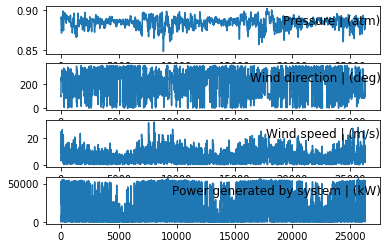

In [9]:
values = df.values
# specify columns to plot
groups = [0, 1, 2, 3]
i = 1
# plot each column
plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler
from pandas import concat
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df1 = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df1.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df1.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
values = df.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)   var2(t)   var3(t)  \
1   0.780615   0.288889   0.104943   0.000000  0.782770  0.294444  0.109650   
2   0.782770   0.294444   0.109650   0.000000  0.778738  0.283333  0.132496   
3   0.778738   0.283333   0.132496   0.035192  0.777995  0.275000  0.140499   
4   0.777995   0.275000   0.140499   0.046014  0.782138  0.272222  0.140217   
5   0.782138   0.272222   0.140217   0.045268  0.787193  0.272222  0.144673   

    var4(t)  
1  0.000000  
2  0.035192  
3  0.046014  
4  0.045268  
5  0.051766  


/home/omkar/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


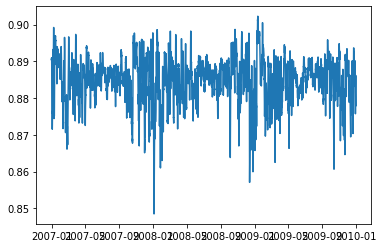

In [11]:
plt.plot(df['Pressure | (atm)'])

In [34]:
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8760, 1, 7) (8760,) (17519, 1, 7) (17519,)


In [23]:
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Train on 8760 samples, validate on 17519 samples
Epoch 1/50
 - 1s - loss: 0.2066 - val_loss: 0.1592
Epoch 2/50
 - 1s - loss: 0.0790 - val_loss: 0.0560
Epoch 3/50
 - 1s - loss: 0.0551 - val_loss: 0.0552
Epoch 4/50
 - 1s - loss: 0.0529 - val_loss: 0.0535
Epoch 5/50
 - 1s - loss: 0.0510 - val_loss: 0.0514
Epoch 6/50
 - 1s - loss: 0.0496 - val_loss: 0.0489
Epoch 7/50
 - 1s - loss: 0.0482 - val_loss: 0.0472
Epoch 8/50
 - 1s - loss: 0.0472 - val_loss: 0.0464
Epoch 9/50
 - 1s - loss: 0.0465 - val_loss: 0.0457
Epoch 10/50
 - 1s - loss: 0.0459 - val_loss: 0.0453
Epoch 11/50
 - 1s - loss: 0.0454 - val_loss: 0.0448
Epoch 12/50
 - 1s - loss: 0.0448 - val_loss: 0.0445
Epoch 13/50
 - 1s - loss: 0.0442 - val_loss: 0.0440
Epoch 14/50
 - 1s - loss: 0.0440 - val_loss: 0.0435
Epoch 15/50
 - 1s - loss: 0.0437 - val_loss: 0.0432
Epoch 16/50
 - 1s - loss: 0.0432 - val_loss: 0.0427
Epoch 17/50
 - 1s - loss: 0.0430 - val_loss: 0.0427
Epoch 18/50
 - 1s - loss: 0.0424 - val_loss: 0.0421
Epoch 19/50
 - 1s - loss

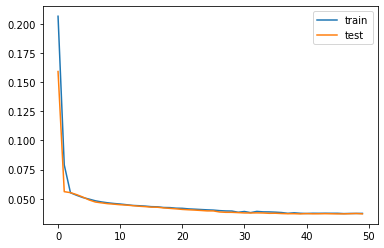

In [24]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()